In [1]:
import pandas as pd
import numpy as np

# Path to your raw data
DATA_PATH = "../data/raw/household_power_consumption.txt"

# Load the dataset
df = pd.read_csv(
    DATA_PATH,
    sep=";",
    parse_dates=[[0, 1]],     # Combine 'Date' and 'Time' into one column
    infer_datetime_format=True,
    na_values="?",
    low_memory=False
)

# Rename the combined datetime column
df.rename(columns={"Date_Time": "datetime"}, inplace=True)

# Set datetime as index
df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%Y %H:%M:%S", errors="coerce")
df = df.set_index("datetime")
df = df.sort_index()

# Drop rows with NaNs (can handle more gracefully later)
df = df.dropna()

# Convert all columns to float
df = df.astype("float")

# Preview cleaned data
print(df.info())
print(df.head())


/var/folders/vh/z39gnh816yx56x5hpfj1mqfh0000gn/T/ipykernel_47543/1343433793.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/var/folders/vh/z39gnh816yx56x5hpfj1mqfh0000gn/T/ipykernel_47543/1343433793.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00         

/var/folders/vh/z39gnh816yx56x5hpfj1mqfh0000gn/T/ipykernel_47543/1343433793.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


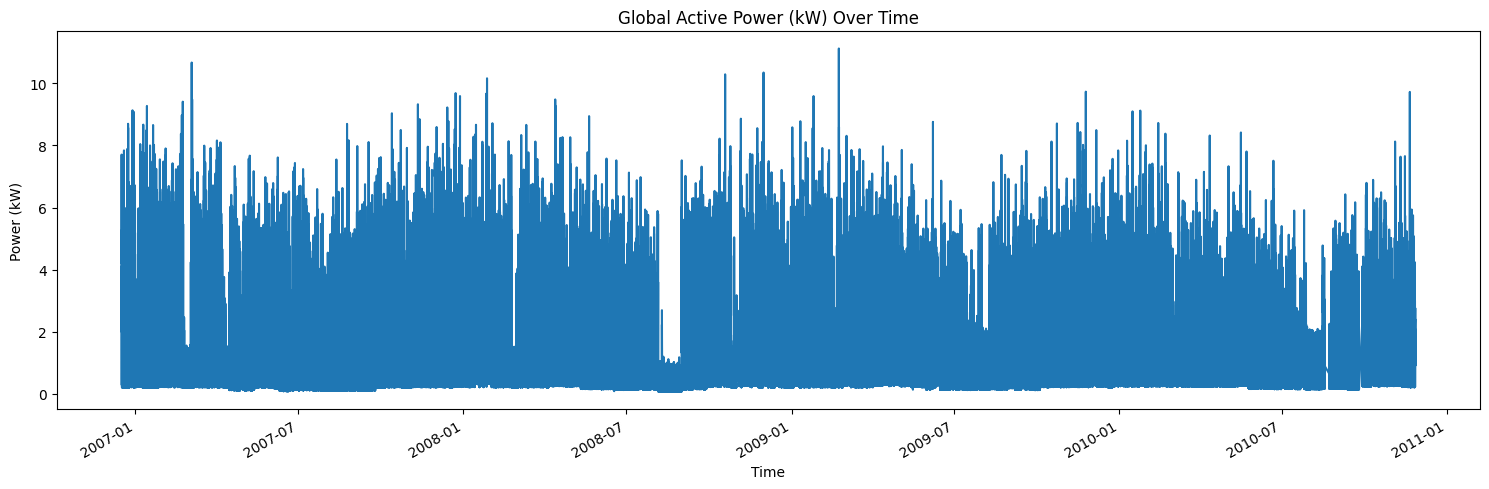

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
df['Global_active_power'].plot(title="Global Active Power (kW) Over Time")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.tight_layout()
plt.show()



In [3]:
# Create processed folder
import os
os.makedirs("../data/processed", exist_ok=True)

# Filter a smaller window (e.g., Feb 2007)
sample_df = df["2007-02-01":"2007-02-10"]   # 10 days of data
sample_df.to_csv("../data/processed/sample_power_data.csv")
print("✅ Sample data saved.")


✅ Sample data saved.
